In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import numpy as np
from tqdm import tqdm
# Construct a tf.data.Dataset
from IPython.display import clear_output
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


In [6]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

ds_train = ds_train.shuffle(ds_train.cardinality())
ds_test = ds_test.shuffle(ds_test.cardinality())

In [7]:
def reshape(image, label):
    #image = tf.image.resize(image, [n, n], method='gaussian', antialias=True)
    image = tf.cast(image, tf.float32) / 255
    return tf.reshape(image, [-1]), label


ds_train = ds_train.map(reshape, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(reshape, num_parallel_calls=tf.data.AUTOTUNE)

In [8]:
trainx = []
trainy= []
testx = []
testy = []
for i, l in ds_train.take(60000):
    trainx.append(i.numpy())
    trainy.append(l.numpy())
for i, l in ds_test.take(10000):
    testx.append(i.numpy())
    testy.append(l.numpy())

In [15]:
n = 16

In [9]:
pca = PCA(n)
x_pca = pca.fit_transform(np.vstack((trainx, testx)))
x_pca = normalize(x_pca)
testx_pca = x_pca[60000:, :]
trainx_pca = x_pca[:60000, :]

In [17]:
ds_train_pca = tf.data.experimental.from_list(
    list(zip(trainx_pca, trainy)), name=None
)
ds_test_pca = tf.data.experimental.from_list(
    list(zip(testx_pca, testy)), name=None
)

In [19]:
ds_train_pca = ds_train_pca.take(4000)
ds_test_pca = ds_test_pca.take(10000)

In [21]:

ds_train_pca = ds_train_pca.cache()
ds_train_pca = ds_train_pca.batch(8)
ds_train_pca = ds_train_pca.prefetch(tf.data.AUTOTUNE)

In [22]:

ds_test_pca = ds_test_pca.batch(8)
ds_test_pca = ds_test_pca.cache()
ds_test_pca = ds_test_pca.prefetch(tf.data.AUTOTUNE)

In [27]:
acc=[]
for i in range(5, 51, 5):
    print(f"Size: {i}")
    model = keras.models.Sequential([
      keras.Input(shape=(n,)),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"])
        
    history = model.fit(
        ds_train_pca,
        epochs=20,
        validation_data=ds_test_pca,
    )
    acc.append((i, history.history['val_accuracy'][-1]))
    clear_output(wait=True)

Size: 50
Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4030 - loss: 2.0252 - val_accuracy: 0.7937 - val_loss: 1.0166
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.8683 - val_accuracy: 0.8408 - val_loss: 0.6156
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.5914 - val_accuracy: 0.8524 - val_loss: 0.5221
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8484 - loss: 0.5143 - val_accuracy: 0.8583 - val_loss: 0.4826
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8529 - loss: 0.4770 - val_accuracy: 0.8628 - val_loss: 0.4591
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.4525 - val_accuracy: 0.8663 - val_loss: 0.4421
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.4335 - val_accuracy: 0.8693 - val_loss: 0.4283
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.4171 - val_acc

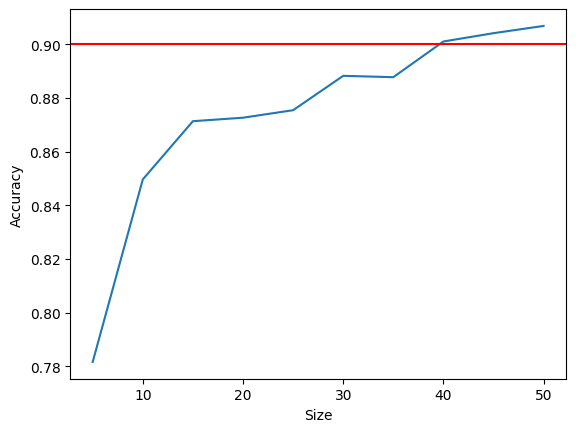

In [30]:
from matplotlib import pyplot as plt
plt.ylabel('Accuracy')
plt.xlabel('Size')
plt.plot(*zip(*acc))
plt.axhline(y = 0.9, color = 'r', label="Quantum") 

In [94]:
acc2=[]
for i in range(50, 1001, 50):
    print(f"Size: {i}")
    model = keras.models.Sequential([
      keras.Input(shape=(n**2,)),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"])
        
    history = model.fit(
        ds_train,
        epochs=100,
        validation_data=ds_test,
    )
    acc2.append((i, history.history['val_accuracy'][-1]))
    clear_output(wait=True)

Size: 1000
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4582 - loss: 1.5586 - val_accuracy: 0.7691 - val_loss: 0.7538
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7476 - loss: 0.7285 - val_accuracy: 0.7845 - val_loss: 0.6661
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7822 - loss: 0.6006 - val_accuracy: 0.7821 - val_loss: 0.6672
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8128 - loss: 0.5316 - val_accuracy: 0.7866 - val_loss: 0.6552
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8274 - loss: 0.4902 - val_accuracy: 0.7954 - val_loss: 0.6320
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8356 - loss: 0.4621 - val_accuracy: 0.8096 - val_loss: 0.5900
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8496 - loss: 0.4362 - val_accuracy: 0.8235 - val_loss: 0.5514
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8596 - loss: 0.4149

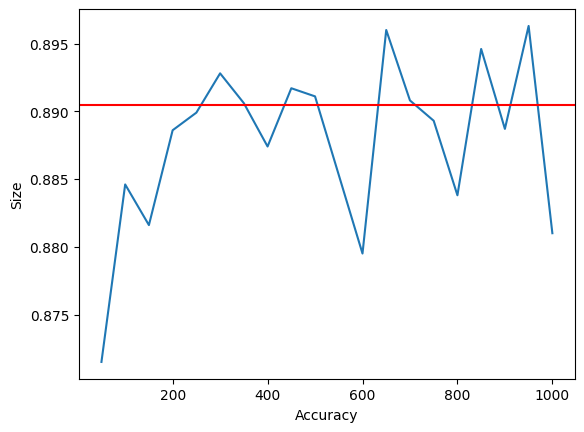

In [95]:
from matplotlib import pyplot as plt
plt.ylabel('Size')
plt.xlabel('Accuracy')
plt.plot(*zip(*acc2))
plt.axhline(y = 0.8905, color = 'r', label="Quantum") 

In [96]:
acc3=[]
for i in range(25, 501, 25):
    print(f"Size: {i}")
    model = keras.models.Sequential([
      keras.Input(shape=(n**2,)),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"])
        
    history = model.fit(
        ds_train,
        epochs=100,
        validation_data=ds_test,
    )
    acc3.append((i, history.history['val_accuracy'][-1]))
    clear_output(wait=True)

Size: 500
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4235 - loss: 1.5907 - val_accuracy: 0.7400 - val_loss: 0.7959
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7358 - loss: 0.7475 - val_accuracy: 0.7659 - val_loss: 0.7095
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7784 - loss: 0.6212 - val_accuracy: 0.7448 - val_loss: 0.7509
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7909 - loss: 0.5625 - val_accuracy: 0.7439 - val_loss: 0.7560
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8061 - loss: 0.5177 - val_accuracy: 0.7725 - val_loss: 0.6914
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8257 - loss: 0.4830 - val_accuracy: 0.7788 - val_loss: 0.6791
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.4595 - val_accuracy: 0.8096 - val_loss: 0.5883
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8567 - loss: 0.4303 

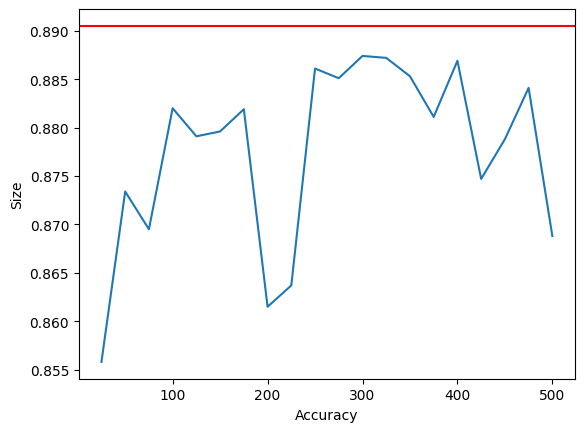

In [97]:
from matplotlib import pyplot as plt
plt.ylabel('Size')
plt.xlabel('Accuracy')
plt.plot(*zip(*acc3))
plt.axhline(y = 0.8905, color = 'r', label="Quantum") 

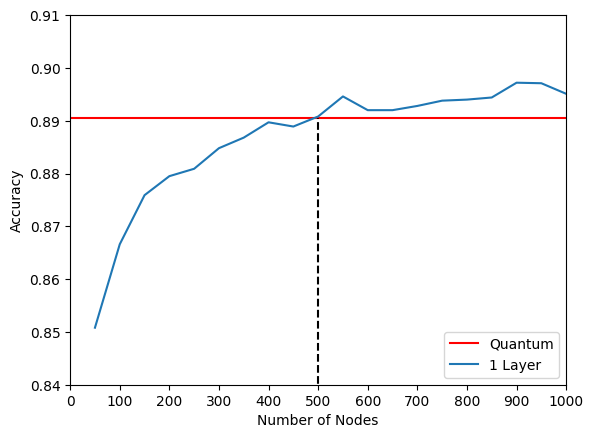

In [118]:
from matplotlib import pyplot as plt
plt.ylabel('Accuracy')
plt.xlabel('Number of Nodes')
plt.axhline(y = 0.8905, color = 'r', label="Quantum")

plt.plot(*zip(*acc), label="1 Layer")
plt.xticks(np.arange(0, 1001, 100))
plt.xlim(0, 1000)
plt.ylim(0.84, 0.91)
plt.vlines([500], 0, [0.8905], linestyle="dashed", color='black')
plt.legend(loc="lower right")
plt.show()

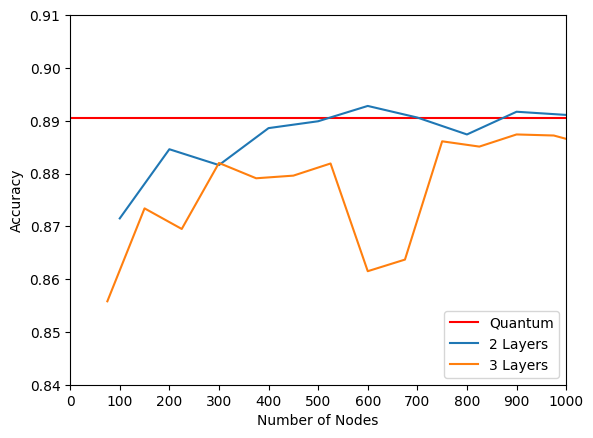

In [115]:

from matplotlib import pyplot as plt

plt.ylabel('Accuracy')
plt.xlabel('Number of Nodes')
plt.axhline(y=0.8905, color='r', label="Quantum")

acc2e = list(map(lambda t: (2 * t[0], t[1]), acc2))
acc3e = list(map(lambda t: (3 * t[0], t[1]), acc3))
plt.plot(*zip(*acc2e), label="2 Layers")
plt.plot(*zip(*acc3e), label="3 Layers")
plt.xticks(np.arange(0, 1501, 100))
plt.xlim(0, 1000)
plt.ylim(0.84, 0.91)
plt.legend(loc="lower right")
plt.show()

In [90]:
'''# TODO: ITERATE THROUGH MULTIPLE NEURAL NETWORK SIZES
acc = []
for i in range(100, 1001, 100):
    print(f"Model Size: {i}")
    model = keras.models.Sequential([
      keras.Input(shape=(n**2,)),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(i, activation="relu"),
      keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"])
        
    history = model.fit(
        ds_train,
        epochs=100,
        validation_data=ds_test,
    )
    acc.append((i, history.history['val_accuracy'][-1]))
    clear_output(wait=True)
    '''

'# TODO: ITERATE THROUGH MULTIPLE NEURAL NETWORK SIZES\nacc = []\nfor i in range(100, 1001, 100):\n    print(f"Model Size: {i}")\n    model = keras.models.Sequential([\n      keras.Input(shape=(n**2,)),\n      keras.layers.Dense(i, activation="relu"),\n      keras.layers.Dense(i, activation="relu"),\n      keras.layers.Dense(10, activation="sigmoid")\n    ])\n    \n    model.compile(optimizer=keras.optimizers.Adam(0.001),\n        loss=keras.losses.SparseCategoricalCrossentropy(),\n        metrics=["accuracy"])\n        \n    history = model.fit(\n        ds_train,\n        epochs=100,\n        validation_data=ds_test,\n    )\n    acc.append((i, history.history[\'val_accuracy\'][-1]))\n    clear_output(wait=True)\n    '